In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
cash = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [112]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [113]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [114]:
# Status
cash_status = cash.groupby('status')['status'].count()
cash_status

status
active                      59
canceled                    33
direct_debit_rejected      831
direct_debit_sent           34
money_back               16397
rejected                  6568
transaction_declined        48
Name: status, dtype: int64

FREQUENCY OF USE

In [115]:
# Convert 'created_at' to datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])

# Sort by 'created_id'
user_operation = cash[['user_id', 'created_at', 'amount']].groupby(['user_id', 'created_at', 'amount']).count().reset_index()
user_operation.loc[:8, ['user_id', 'created_at']]

,user_id,created_at
0,34.0,2020-04-20 15:50:21.187257+00:00
1,35.0,2019-12-13 20:27:38.106778+00:00
2,35.0,2019-12-28 04:00:22.349592+00:00
3,35.0,2020-01-27 19:50:46.387431+00:00
4,35.0,2020-02-28 10:51:11.440880+00:00
5,35.0,2020-03-17 07:28:11.282767+00:00
6,35.0,2020-08-17 13:19:41.318905+00:00
7,35.0,2020-09-19 10:25:54.265935+00:00
8,47.0,2019-11-19 13:57:53.511561+00:00


In [116]:
# Take the first operations of each client
first_operations = user_operation.drop_duplicates(subset='user_id')
first_operations['month_creation'] = first_operations['created_at'].dt.to_period('M')
first_operations

/tmp/ipykernel_151046/947344678.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_operations['month_creation'] = first_operations['created_at'].dt.to_period('M')
/tmp/ipykernel_151046/947344678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_operations['month_creation'] = first_operations['created_at'].dt.to_period('M')


,user_id,created_at,amount,month_creation
0,34.0,2020-04-20 15:50:21.187257+00:00,100.0,2020-04
1,35.0,2019-12-13 20:27:38.106778+00:00,100.0,2019-12
8,47.0,2019-11-19 13:57:53.511561+00:00,1.0,2019-11
16,52.0,2019-12-17 09:01:12.584634+00:00,100.0,2019-12
20,53.0,2019-12-21 11:39:03.844436+00:00,100.0,2019-12
...,...,...,...,...
21862,103425.0,2020-11-01 20:31:53.965482+00:00,100.0,2020-11
21863,103437.0,2020-11-01 19:35:00.540424+00:00,100.0,2020-11
21864,103496.0,2020-11-01 19:30:26.434400+00:00,100.0,2020-11
21865,103503.0,2020-11-01 20:12:26.857203+00:00,50.0,2020-11


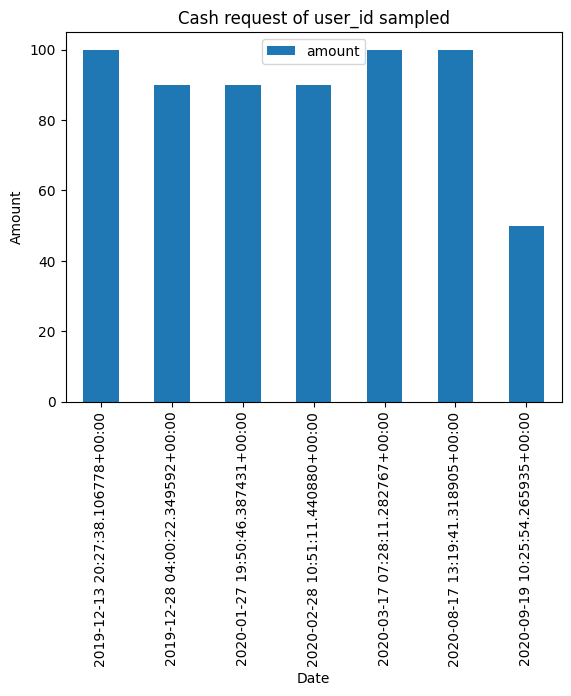

In [117]:
user_sample = cash[cash['user_id'] == 35].sort_values(by='created_at')
user_sample.plot(x='created_at', y='amount', kind='bar')
plt.title('Cash request of user_id sampled')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.show()

In [118]:
total_amount_sample = user_sample['amount'].cumsum()
total_amount_sample

58      100.0
180     190.0
345     280.0
91      370.0
670     470.0
5298    570.0
6842    620.0
Name: amount, dtype: float64

<Axes: xlabel='created_at'>

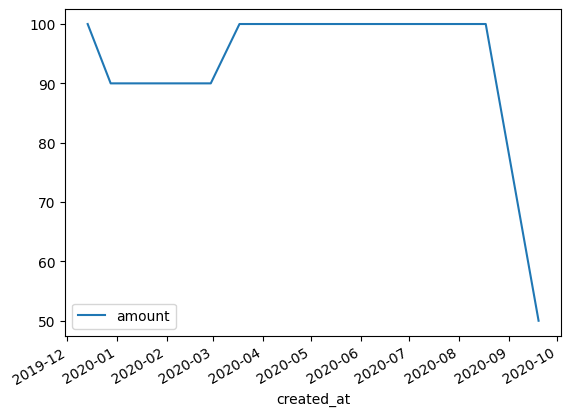

In [119]:
pivot_data = user_sample.pivot_table(values='amount', index='created_at')
pivot_data.plot()

<Axes: xlabel='month_creation'>

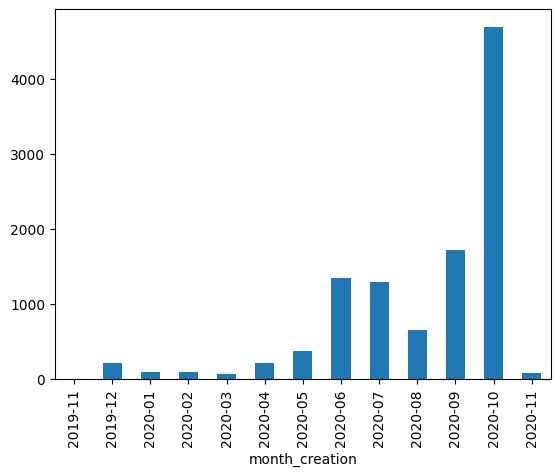

In [120]:
first_amount = first_operations.groupby('month_creation')['amount'].sum()
first_count = first_operations.groupby('month_creation')['user_id'].count()
first_count.plot(kind='bar')

<Axes: xlabel='month_creation'>

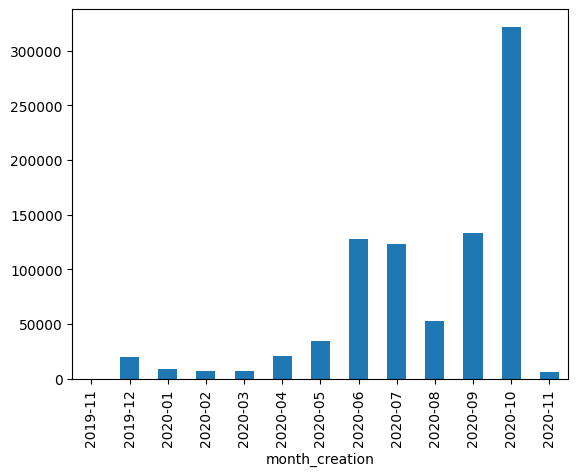

In [121]:
first_amount.plot(kind='bar')

In [122]:
# Filtrar el Data Frame
first_cohorte = first_operations[(first_operations['month_creation'] == '2020-11') & (first_operations['amount'] > 0)]
first_cohorte

,user_id,created_at,amount,month_creation
10024,21056.0,2020-11-01 12:16:07.470936+00:00,50.0,2020-11
12195,28349.0,2020-11-01 12:13:33.457130+00:00,50.0,2020-11
13120,32075.0,2020-11-01 13:23:58.611194+00:00,50.0,2020-11
13305,32742.0,2020-11-01 09:10:19.324784+00:00,50.0,2020-11
15395,39919.0,2020-11-01 12:18:43.421097+00:00,100.0,2020-11
...,...,...,...,...
21862,103425.0,2020-11-01 20:31:53.965482+00:00,100.0,2020-11
21863,103437.0,2020-11-01 19:35:00.540424+00:00,100.0,2020-11
21864,103496.0,2020-11-01 19:30:26.434400+00:00,100.0,2020-11
21865,103503.0,2020-11-01 20:12:26.857203+00:00,50.0,2020-11


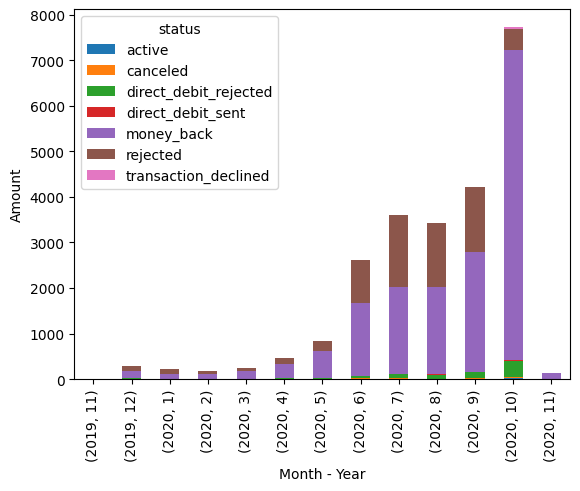

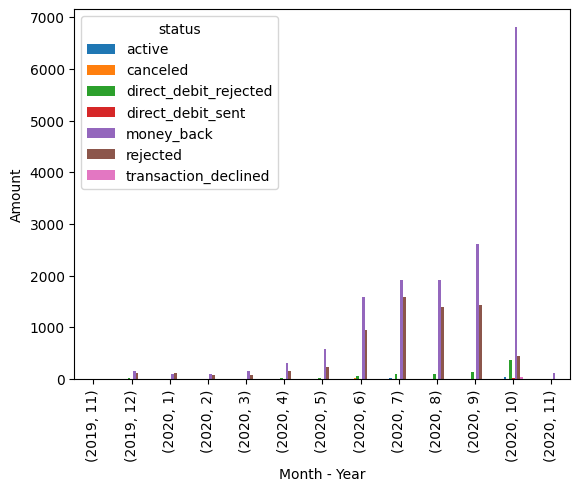

In [123]:
# Count of cash requests griuped by date and status

status_cash = cash.copy()

status_cash["month"] = status_cash["created_at"].dt.month
status_cash["year"] = status_cash["created_at"].dt.year

gb = status_cash.groupby(["year", "month", "status"]).size().unstack(fill_value=0)
for stacked in [True, False]:
    gb.plot(kind="bar", stacked=stacked, xlabel="Month - Year", ylabel="Amount")